# Mutual Information

MI estimates for a discret target variable

- MI between two random variables is a non-negative value, which measures the dependancy between the variables.
- It is 0 iff two random variables are independent
- Higher values mean higher dependancy.

In nutshell, A quantity called MI measures the amount of information one can obtain from one random variable givne another.

- The MI between two random variables X and Y can be stated as follows:
- `I(X, Y) = H(X) - H(X|Y)`
- I(X, Y) -> MI for X and Y
- H(X) -> entropy of X
- H(X|Y) -> entropy of X given Y
- **The result is in bits: range(0 - 1)**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('./data/wine.csv')
df.head()

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [2]:
df['Wine'].unique()

array([1, 2, 3])

In [3]:
# Some info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Wine                  178 non-null    int64  
 1   Alcohol               178 non-null    float64
 2   Malic.acid            178 non-null    float64
 3   Ash                   178 non-null    float64
 4   Acl                   178 non-null    float64
 5   Mg                    178 non-null    int64  
 6   Phenols               178 non-null    float64
 7   Flavanoids            178 non-null    float64
 8   Nonflavanoid.phenols  178 non-null    float64
 9   Proanth               178 non-null    float64
 10  Color.int             178 non-null    float64
 11  Hue                   178 non-null    float64
 12  OD                    178 non-null    float64
 13  Proline               178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.drop(labels=['Wine'], axis=1), df['Wine'], test_size=0.3, random_state=42)
X_train.shape, X_test.shape

((124, 13), (54, 13))

# Mutual Information

In [5]:
from sklearn.feature_selection import mutual_info_classif

# determine MI
mutual_info = mutual_info_classif(X_train, y_train)
mutual_info

array([0.42392906, 0.28076888, 0.11274869, 0.23785569, 0.23206821,
       0.40338851, 0.69983773, 0.0923911 , 0.36106338, 0.53249906,
       0.59693246, 0.52101781, 0.52389176])

Let's the plot the values to get the idea of the features

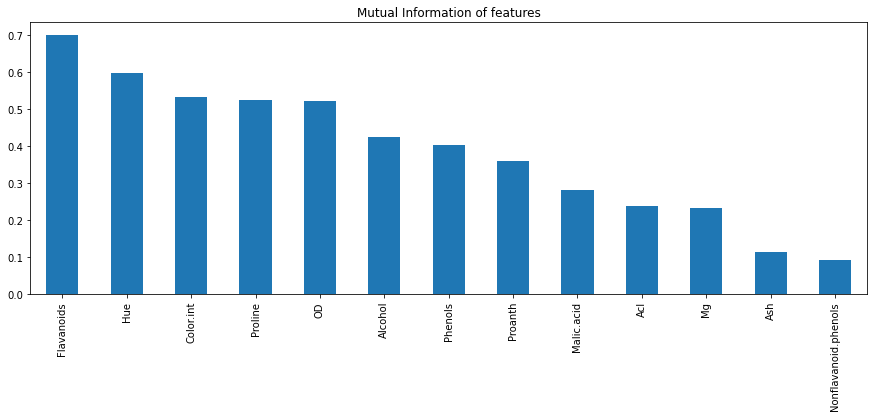

In [6]:
# Converting this to Series
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns

mutual_info.sort_values(ascending=False).plot(kind='bar', figsize=(15, 5))
plt.title('Mutual Information of features')
plt.show()

As we can see highest dependancy between target variable `Wine` and a particular independant feature is `Flavanoids`

- We can select k number of features for building our model...

# Select K features

In [7]:
from sklearn.feature_selection import SelectKBest

# Select top 5 important features
sel_five_cols = SelectKBest(mutual_info_classif, k=5)
sel_five_cols.fit(X_train, y_train)
X_train.columns[sel_five_cols.get_support()]

Index(['Flavanoids', 'Color.int', 'Hue', 'OD', 'Proline'], dtype='object')

Now we can select these features as our baseline to build some kind of a model...